In [1]:
import pandas as pd 
import sqlite3
import seaborn as sns
import datetime
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
conn = sqlite3.connect('twitch.db')

In [3]:
sql = """
SELECT *
FROM Twitch_Directory
"""
# Read the sql query into pandas to view the results
twitch_data = pd.read_sql_query(sql, conn)
twitch_data.head()

,index,Date,Time,Directory Name,Viewer Count
0,0,2022-01-31,10:45:52,Just Chatting,390431
1,1,2022-01-31,10:45:52,Grand Theft Auto V,239160
2,2,2022-01-31,10:45:52,League of Legends,219827
3,3,2022-01-31,10:45:52,VALORANT,137060
4,4,2022-01-31,10:45:52,Fortnite,115131


In [4]:
twitch_data['Directory Name'].replace({'Lost Ark' : 'LOST ARK'}, inplace=True)

In [5]:
twitch_data.drop(columns='index', inplace=True)
twitch_data.set_index('Date', inplace=True)
new_week = twitch_data.loc['2022-03-06' : '2022-03-12']
new_week.reset_index(inplace=True)

Daily Update Graph

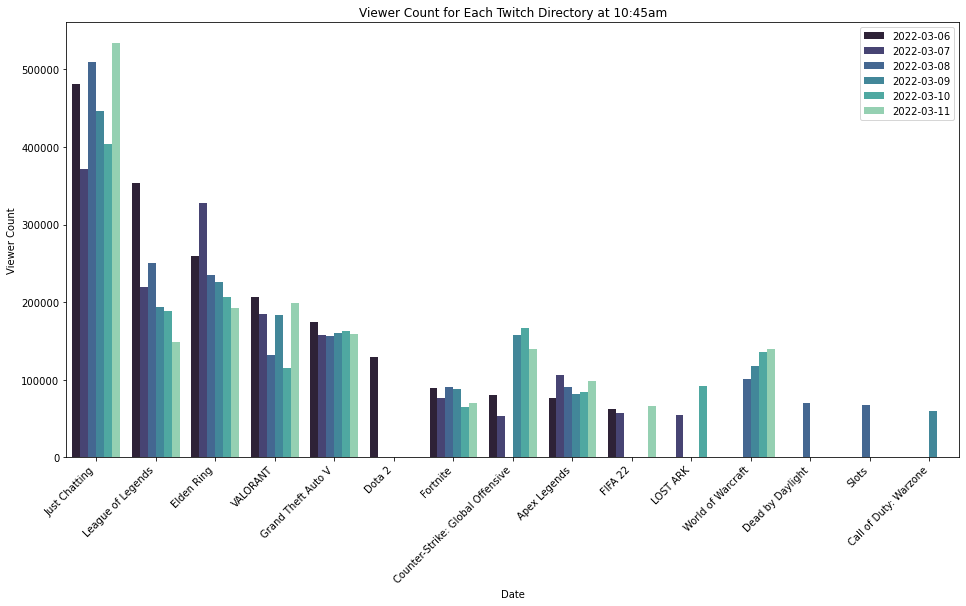

In [6]:
plt.figure(figsize=(16,8))
sns.barplot(x= new_week['Directory Name'], y=new_week['Viewer Count'], hue=new_week['Date'], palette='mako', ci=None)
plt.xticks(rotation=45,ha='right')
plt.title('Viewer Count for Each Twitch Directory at 10:45am')
plt.xlabel('Date')
plt.ylabel('Viewer Count')
plt.legend(loc=('upper right'))
plt.show()

Current Weekly Summary

In [7]:
twitch_data.reset_index(inplace=True)
twitch_data

,Date,Time,Directory Name,Viewer Count
0,2022-01-31,10:45:52,Just Chatting,390431
1,2022-01-31,10:45:52,Grand Theft Auto V,239160
2,2022-01-31,10:45:52,League of Legends,219827
3,2022-01-31,10:45:52,VALORANT,137060
4,2022-01-31,10:45:52,Fortnite,115131
...,...,...,...,...
395,2022-03-11,10:46:07,World of Warcraft,139645
396,2022-03-11,10:46:07,Counter-Strike: Global Offensive,139622
397,2022-03-11,10:46:07,Apex Legends,98011
398,2022-03-11,10:46:07,Fortnite,70592


In [8]:
new_week['Date'] = pd.to_datetime(new_week['Date'])

<ipython-input-8-36bebabededa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_week['Date'] = pd.to_datetime(new_week['Date'])


In [9]:
max_group = new_week.groupby(['Directory Name']).resample('W-Sat', on='Date').max()
max_group = max_group.drop(columns=['Date', 'Directory Name']).reset_index()

Weekly avg viewership

In [10]:
mean_group = new_week.groupby(['Directory Name']).resample('W-Sat', on='Date').mean()
mean_group.reset_index(inplace=True)
mean_group

,Directory Name,Date,Viewer Count
0,Apex Legends,2022-03-12,89387.000000
1,Call of Duty: Warzone,2022-03-12,59824.000000
2,Counter-Strike: Global Offensive,2022-03-12,119493.000000
3,Dead by Daylight,2022-03-12,70085.000000
4,Dota 2,2022-03-12,129195.000000
5,Elden Ring,2022-03-12,241194.333333
6,FIFA 22,2022-03-12,62159.333333
7,Fortnite,2022-03-12,79991.500000
8,Grand Theft Auto V,2022-03-12,161525.666667
9,Just Chatting,2022-03-12,457678.333333


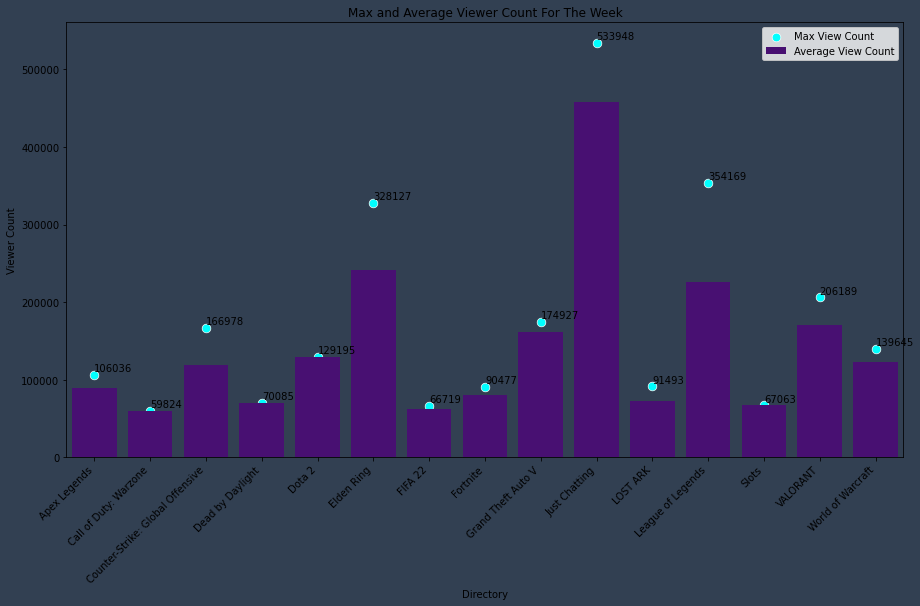

In [11]:
fig = plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=max_group['Directory Name'], y=max_group['Viewer Count'] , color='aqua',s=75,label='Max View Count')
sns.barplot(x=mean_group['Directory Name'], y=mean_group['Viewer Count'], color='indigo', label = 'Average View Count')
plt.xticks(rotation=45,ha='right')
a = pd.concat({'x': max_group['Directory Name'], 'y': max_group['Viewer Count'], 'val': max_group['Viewer Count']}, axis=1)
for i, point in a.iterrows():
    ax.text(point['x'], point['y']+4500, str(point['val']))

plt.title('Max and Average Viewer Count For The Week')
plt.xlabel('Directory')
plt.ylabel('Viewer Count')
ax.set_facecolor('#324052')
fig.set_facecolor('#324052')
plt.legend(loc=('upper right'))
plt.show()

All Time

In [12]:
total = twitch_data.groupby('Directory Name').max().reset_index().rename(columns={"Viewer Count" : 'Max Viewer Count'})
total['Average']  = twitch_data.groupby('Directory Name').mean().reset_index().rename(columns={'Viewer Count' : 'Average'})['Average']
total['Min'] = twitch_data.groupby('Directory Name').min().reset_index().rename(columns={'Viewer Count' : 'Min'})['Min']

total max and total average

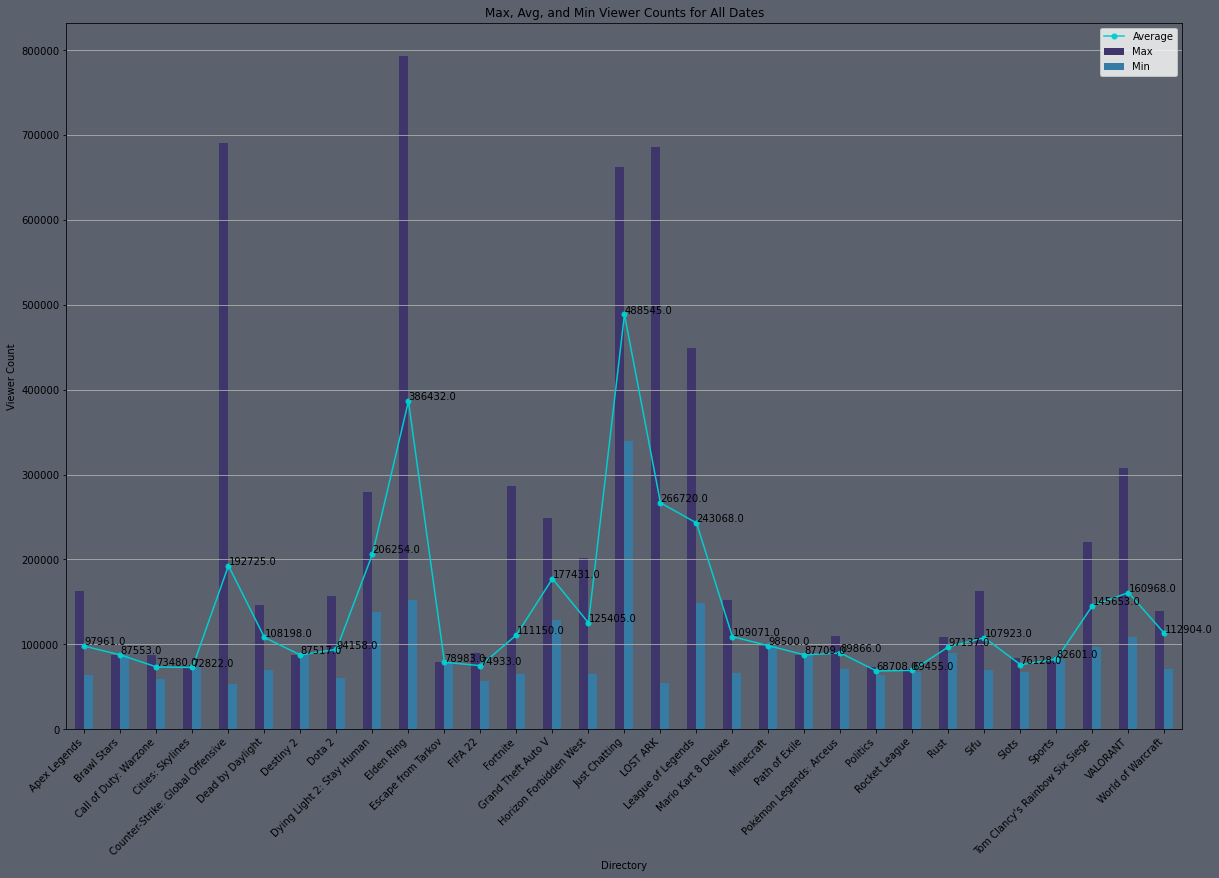

In [13]:
fig, ax = plt.subplots(figsize=(20,13))

fig.set_facecolor('#5b626e')
ax.set_facecolor('#5b626e')

cmap = sns.color_palette('mako', n_colors=3)

#####PANDAS PLOT######PANDAS PLOT######PANDAS PLOT######PANDAS PLOT######PANDAS PLOT######PANDAS PLOT######PANDAS PLOT
total.plot( x='Directory Name',ax=ax ,y=['Max Viewer Count', 'Min'],kind='bar', color=cmap, label=['Max', 'Min'])
total.plot(x='Directory Name', y='Average', kind='line', ax=ax, color='darkturquoise', label='Average', marker='.', ms=10)


plt.xticks(rotation=45,ha='right')
plt.title('Max, Avg, and Min Viewer Counts for All Dates')
plt.xlabel('Directory')
plt.ylabel('Viewer Count')

x=total['Directory Name']
y=  total['Average']
label='Average'

for i , g in enumerate(total['Average']):
    plt.text(i, g+1500, f'{np.round(g)}')
plt.legend()
plt.grid(axis='y')
plt.show()